2.713622643
0.35374


(array([3.82556320e-03, 3.36649562e-02, 9.48739674e-02, 1.65264330e-01,
        2.21882666e-01, 2.35654693e-01, 2.76205663e-01, 2.58608072e-01,
        3.26703097e-01, 2.62433636e-01, 2.22647778e-01, 1.80566583e-01,
        2.44070932e-01, 3.01454380e-01, 3.86381883e-01, 4.60597810e-01,
        6.22801689e-01, 6.74829349e-01, 7.91126470e-01, 8.23261201e-01,
        8.58456383e-01, 8.33207665e-01, 7.89596245e-01, 6.81715363e-01,
        5.78425156e-01, 4.72839612e-01, 2.86917240e-01, 2.15761765e-01,
        1.22418022e-01, 8.56926157e-02, 5.35578848e-02, 3.74905194e-02,
        3.06045056e-02, 2.06580413e-02, 1.91278160e-02, 9.18135169e-03,
        1.37720275e-02, 7.65112640e-03, 6.12090112e-03, 6.12090112e-03,
        1.53022528e-03, 2.29533792e-03, 2.29533792e-03, 7.65112640e-04,
        7.65112640e-04, 2.29533792e-03, 1.53022528e-03, 0.00000000e+00,
        3.06045056e-03, 1.53022528e-03]),
 array([2.00750751, 2.09274274, 2.17797798, 2.26321321, 2.34844845,
        2.43368368, 2.5189

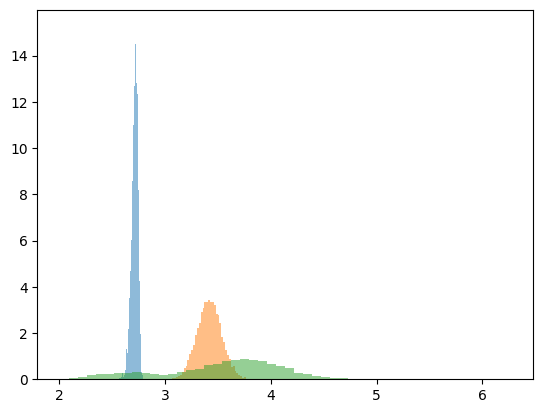

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics

# generate toy data for TOV
def gen_TOV_samples(mean, std_dev, n_samples):
    samples = np.random.normal(loc=mean, scale=std_dev, size=n_samples)
    return samples

# use Monte carlo methods to compute the new masses with rotation
def gen_ROT_samples(TOV_samples,R_mean,R_error):
    mR_samples = []
    for i in range(len(TOV_samples)):
        mR_samples.append(TOV_samples[i]*np.random.normal(loc=R_mean,scale=R_error,size=1)[0])
    return mR_samples

# calculates a random integer from 0 to N
def random_int(upper_limit):
    return random.randint(0,upper_limit)

# Computes the probability of that the observed measurement is described by the theoretical value
# using Monte carlo sampling
def MC_prob(the_samples, exp_samples, nruns):
    # Monte Carlo code to compute probability
    count = 0
    for i in range(nruns):
        rTh = random_int(len(the_samples)-1)
        rEx = random_int(len(exp_samples)-1)
        mTh = the_samples[rTh]
        mEx = exp_samples[rEx]
        if (mTh > mEx):
            count = count + 1

    prob = count/nruns
    return prob

# Using the probability function, obtain a sampling array of the experimental measurement from LIGO
# uses accept/reject sampling
def gen_exp_samples(file,npoints):
    prob_func = np.loadtxt(file)
    size = len(prob_func)

    exp_masses = []
    for i in range(npoints):
        index = random_int(size-1)
        r = random.random()
        p = prob_func[index][1]
        mass = prob_func[index][0]
        if (r<p):
            exp_masses.append(mass)
    return exp_masses

# define number of samples in samplings
N_samples = 100000

# define the mass increase factors with rotation
rot_factor = 1.260
rot_error = 0.04

# import TOV masses
mTOV_samples = np.loadtxt("MCMC_complete_28.txt")[:,17]
#mTOV_samples = gen_TOV_samples(2.75,0.01,100000)
print(statistics.mean(mTOV_samples))

# generate maximum masses with rotation
mMAX_samples = gen_ROT_samples(mTOV_samples,rot_factor,rot_error)

with open("Calibration_28.txt",'w') as file:
    for i in range(10000):
        print(mTOV_samples[i],file=file,end="  ")
        print(mMAX_samples[i],file=file)


# generate EXP masses
mEXP_samples = gen_exp_samples("mass_ls_data.txt",N_samples)

# compute probability
prob = MC_prob(mMAX_samples,mEXP_samples,N_samples)
print(prob)

#s2 = rot_factor**2 * 0.1**2 + 2.7**2 * rot_error**2
#test = gen_TOV_samples(2.7*rot_factor,np.sqrt(s2),100000)
plt.hist(mTOV_samples,bins=50,density=True,alpha=0.5)
plt.hist(mMAX_samples,bins=50,density=True,alpha=0.5)
plt.hist(mEXP_samples,bins=50,density=True,alpha=0.5)

In [2]:
import statistics
import numpy as np

samples = np.loadtxt("MCMC_complete_26.txt")
# Get mean values and uncertainties for the bulk properties

for i in range(7):
    print(statistics.mean(samples[:,i]))


-16.26995407
1.312671339
0.5843732534
244.3419784
33.23473693
45.74291391
0.00356977081667
0.0004102762846
